In [1]:
import pandas as pd


In [8]:
import pandas as pd

# Load the TSV file
column_names = ['label', 'message']
file_path = r'C:\Users\ayush\OneDrive\Desktop\coding\NLPEXcersice\SMSSpamCollection'  # Replace with the path to your TSV file
df = pd.read_csv(file_path, sep='\t' , names=column_names, header=None)

# Display the first few rows of the DataFrame
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [11]:
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
import nltk

In [9]:
print(df.columns)

Index(['label', 'message'], dtype='object')


In [12]:
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the preprocessing to the 'message' column
df['cleaned_message'] = df['message'].apply(preprocess_text)


In [13]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label']


In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.9704035874439462


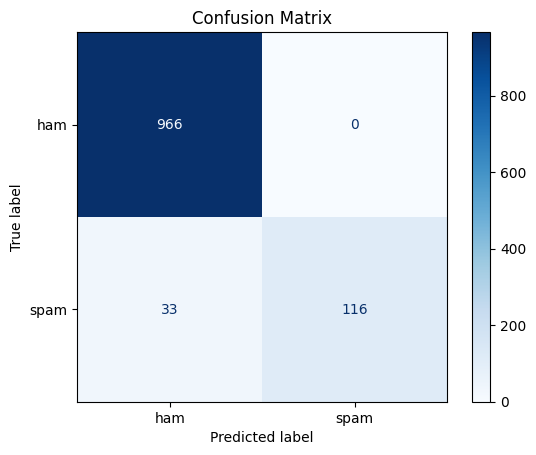

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# Example of predicting new messages
new_messages = ["Congratulations! You've won a free ticket!", "Let's catch up tomorrow."]
new_cleaned = [preprocess_text(msg) for msg in new_messages]  # Preprocess new messages
new_features = vectorizer.transform(new_cleaned)  # Convert to TF-IDF features
predictions = model.predict(new_features)

# Output predictions
for message, prediction in zip(new_messages, predictions):
    print(f'Message: "{message}" is classified as: {prediction}')


Message: "Congratulations! You've won a free ticket!" is classified as: ham
Message: "Let's catch up tomorrow." is classified as: ham
